## Load data

In [ ]:
# Load librairies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
# import dataset
df = pd.read_excel('/content/prod_views_data_view_farm_season_field.xlsx')
print('size of dataset', df.shape)
df.head()

size of dataset (172, 52)


,farm_id,farm_name,farm_season_id,season,programme_year,farm_season_field_id,farm_season_field_name,area,has_cover_crops,organic,...,em_fert_production,em_fert_application,em_residues,em_fuel,em_pesticides,em_seed_production,em_irrigation,em_mgmt_changes,em_total,em_ghg_total
0,1555,GFA Moulas,1208,2020-2021,1,16515,Champ 0,0.29,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1555,GFA Moulas,1208,2020-2021,1,16516,SB,5.39,True,False,...,0.48683,1.18427,0.39186,0.15218,0.1435,0.0,0.16886,-1.33808,2.52750,1.18942
2,1555,GFA Moulas,1208,2020-2021,1,16517,Champ 2,0.08,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1555,GFA Moulas,1208,2020-2021,1,16518,POMP,12.13,False,False,...,0.94747,0.58539,0.21469,0.21425,0.0820,0.0,0.02452,0.00000,2.06832,2.06832
4,1555,GFA Moulas,1208,2020-2021,1,16519,PIV1,10.04,True,False,...,0.48683,1.18427,0.39186,0.15218,0.1435,0.0,0.13747,-1.33808,2.49611,1.15803


In [ ]:
# check join keys for later
df['farm_season_field_id'].isna().sum()
# df['farm_season_field_id'].nunique()

duplicated_ids = df['farm_season_field_id'].value_counts()
duplicated_ids = duplicated_ids[duplicated_ids > 1].index


df_duplicated = df[df['farm_season_field_id'].isin(duplicated_ids)]

# drop

df= df.drop_duplicates(subset='farm_season_field_id', keep='last')



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, 0 to 171
Data columns (total 52 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   farm_id                       168 non-null    int64  
 1   farm_name                     168 non-null    object 
 2   farm_season_id                168 non-null    int64  
 3   season                        168 non-null    object 
 4   programme_year                168 non-null    int64  
 5   farm_season_field_id          168 non-null    int64  
 6   farm_season_field_name        168 non-null    object 
 7   area                          168 non-null    float64
 8   has_cover_crops               168 non-null    bool   
 9   organic                       168 non-null    bool   
 10  irrigated                     168 non-null    bool   
 11  artificial_drainage           168 non-null    bool   
 12  agroforestry                  168 non-null    bool   
 13  was_pastur

In [ ]:
#df.nunique()
df = df.loc[:, df.nunique() > 1]


(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.5, '0.5'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.5, '1.5'),
  Text(0, 2.0, '2.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 3.0, '3.0'),
  Text(0, 3.5, '3.5'),
  Text(0, 4.0, '4.0'),
  Text(0, 4.5, '4.5')])

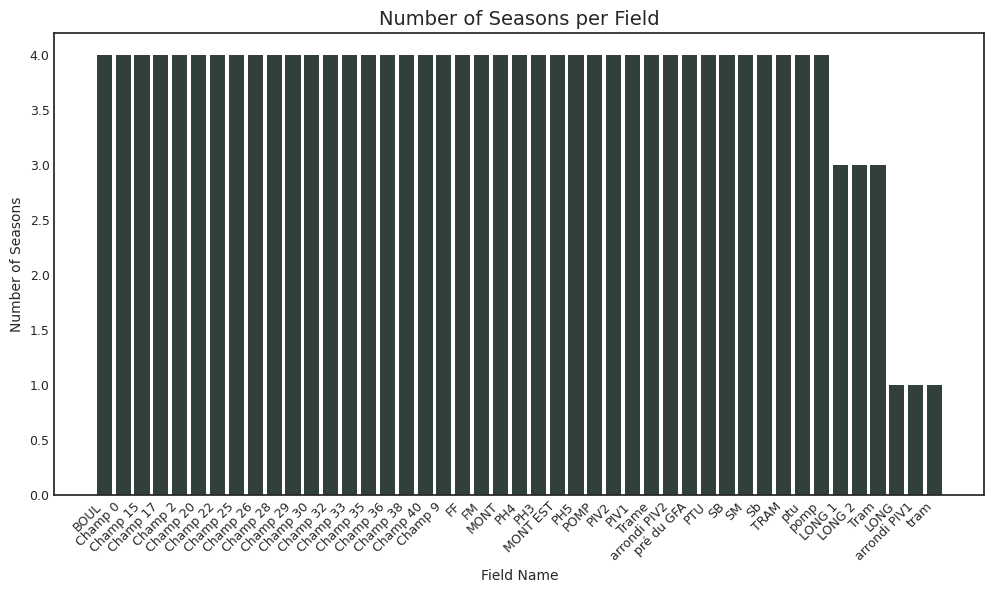

In [ ]:
## same field name over the years ?

# Let's count how many unique seasons exist per field name
field_season_counts = df.groupby('farm_season_field_name')['season'].nunique().reset_index()
field_season_counts.columns = ['field_name', 'num_seasons']

# Sort to see which farms appear in multiple seasons
field_season_counts = field_season_counts.sort_values(by='num_seasons', ascending=False)

plt.style.use('seaborn-v0_8-white')  # clean background
bar_color = "#32403D"  # Soil Capital muted blue

plt.figure(figsize=(12, 6))
bars = plt.bar(field_season_counts['field_name'], field_season_counts['num_seasons'], color=bar_color)

plt.title('Number of Seasons per Field', fontsize=14, fontname='DejaVu Sans')
plt.xlabel('Field Name', fontname='DejaVu Sans', fontsize=10)
plt.ylabel('Number of Seasons', fontname='DejaVu Sans', fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=9, fontname='DejaVu Sans')
plt.yticks(fontsize=9, fontname='DejaVu Sans')

## Clean data

In [ ]:
df.columns

Index(['farm_season_id', 'season', 'programme_year', 'farm_season_field_id',
       'farm_season_field_name', 'area', 'has_cover_crops', 'irrigated',
       'organic_matter', 'soil_ph', 'soil_ph_cft_id', 'declared_tillage_id',
       'declared_tillage_name', 'farm_season_field_crop_id',
       'field_permament_crop', 'crop_id', 'crop_name', 'yield',
       'with_companion_crop', 'apparented_to_cc', 'crop_order',
       'em_fert_production', 'em_fert_application', 'em_residues', 'em_fuel',
       'em_pesticides', 'em_irrigation', 'em_mgmt_changes', 'em_total',
       'em_ghg_total'],
      dtype='object')

In [ ]:
key_columns = ['farm_season_id','programme_year', 'farm_season_field_id','farm_season_field_name',
       'has_cover_crops', 'irrigated',
       'organic_matter', 'soil_ph',
       'declared_tillage_name',
       'field_permament_crop', 'crop_name', 'yield','em_ghg_total']

In [ ]:
df = df[key_columns]

## Check correlation

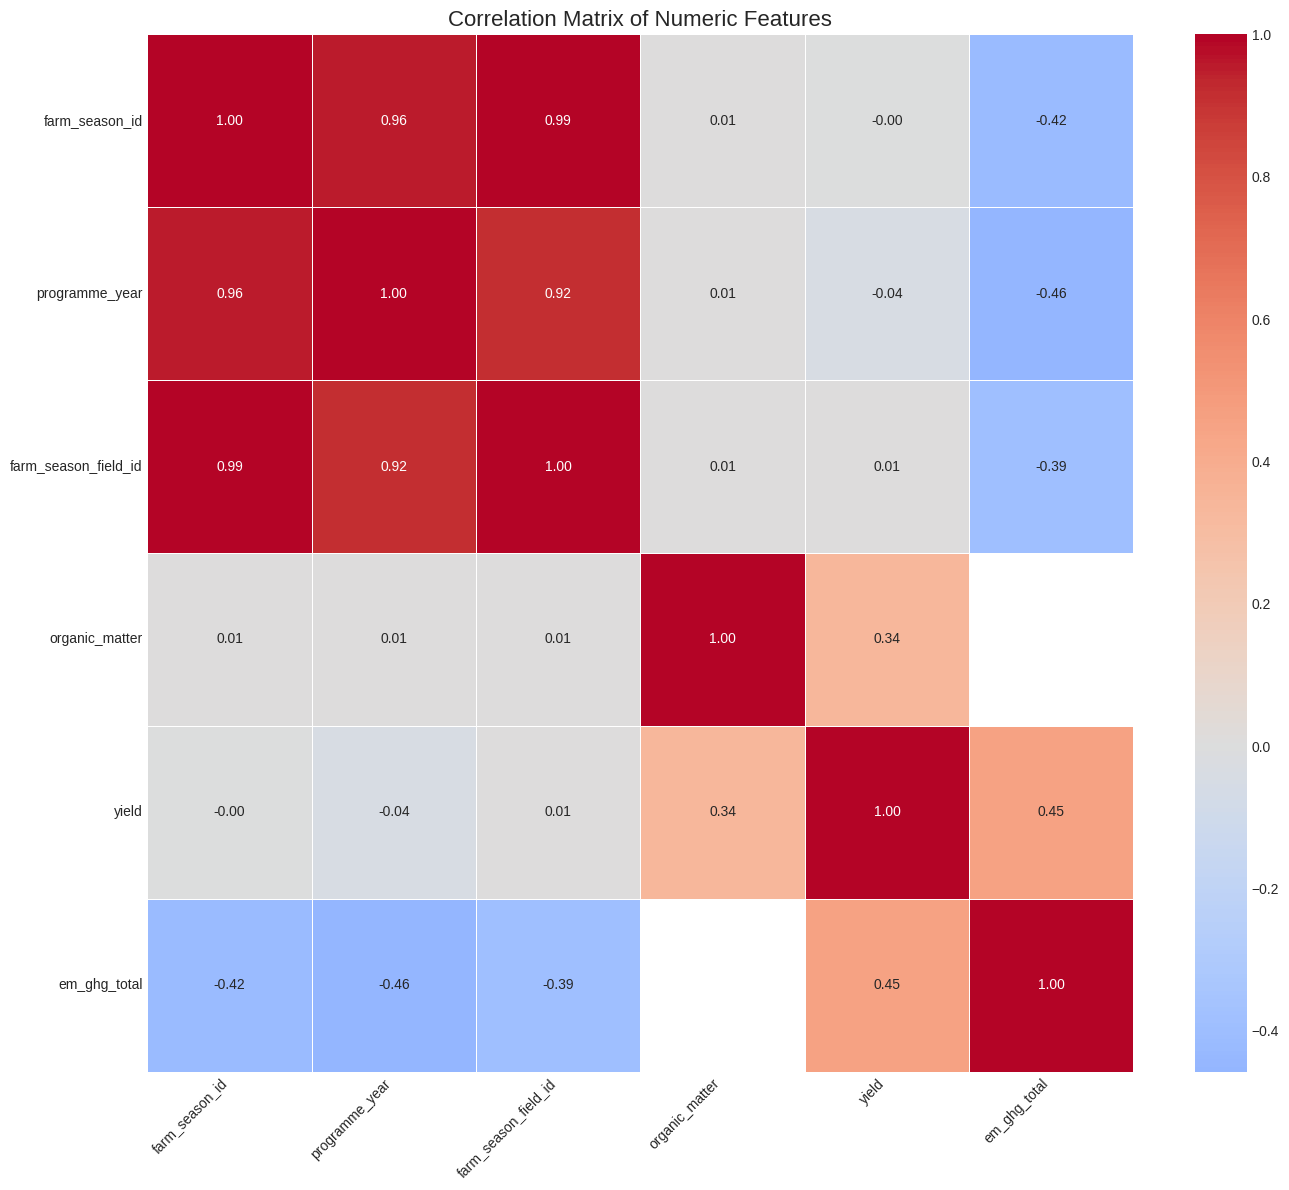

In [ ]:
numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr()


plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



In [ ]:
df.isna().sum()
df.fillna(np.nan)
# 9% missing for organic_matter, soil_ph - 20% and em - 44%

,farm_season_id,programme_year,farm_season_field_id,farm_season_field_name,has_cover_crops,irrigated,organic_matter,soil_ph,declared_tillage_name,field_permament_crop,crop_name,yield,em_ghg_total
0,1208,1,16515,Champ 0,False,False,1.7,5.5 - 7.3,no tillage,True,Permanent pasture,0.0,NaN
1,1208,1,16516,SB,True,True,1.7,5.5 - 7.3,reduced till,False,Grain corn,12.6,1.189420
2,1208,1,16517,Champ 2,False,False,1.7,5.5 - 7.3,no tillage,True,Permanent pasture,0.0,NaN
3,1208,1,16518,POMP,False,True,1.7,5.5 - 7.3,conventional till,False,Durum winter wheat,5.3,2.068320
4,1208,1,16519,PIV1,True,True,1.7,5.5 - 7.3,reduced till,False,Grain corn,12.6,1.158030
...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,7283,4,360943,Tram,True,True,NaN,NaN,reduced till,False,Grain corn,12.2,0.425221
168,7283,4,360944,Trame,True,True,NaN,NaN,reduced till,False,Grain corn,12.2,0.461348
169,7283,4,360945,LONG 1,True,True,NaN,NaN,reduced till,False,Grain corn,12.2,0.442063
170,7283,4,360946,LONG 2,True,True,NaN,NaN,reduced till,False,Grain corn,12.2,0.405940


In [ ]:
df['farm_season_field_id'].duplicated()

,farm_season_field_id
0,False
1,False
2,False
3,False
4,False
...,...
167,False
168,False
169,False
170,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, 0 to 171
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   farm_season_id          168 non-null    int64  
 1   programme_year          168 non-null    int64  
 2   farm_season_field_id    168 non-null    int64  
 3   farm_season_field_name  168 non-null    object 
 4   has_cover_crops         168 non-null    bool   
 5   irrigated               168 non-null    bool   
 6   organic_matter          153 non-null    float64
 7   soil_ph                 135 non-null    object 
 8   declared_tillage_name   130 non-null    object 
 9   field_permament_crop    168 non-null    bool   
 10  crop_name               168 non-null    object 
 11  yield                   168 non-null    float64
 12  em_ghg_total            92 non-null     float64
dtypes: bool(3), float64(3), int64(3), object(4)
memory usage: 14.9+ KB


In [ ]:
df['soil_ph'].value_counts()

,count
soil_ph,
5.5 - 7.3,91
7.3 - 8.5,40
< 5.5,4


In [ ]:

# Convert soil pH to numeric midpoints - to try to plot correlation
def ph_to_numeric(value):
    if isinstance(value, str):
        value = value.strip()
        if value == "< 5.5":
            return 5.0
        elif value == "5.5 - 7.3":
            return (5.5 + 7.3) / 2  # 6.4
        elif value == "7.3 - 8.5":
            return (7.3 + 8.5) / 2  # 7.9
    return None

df['soil_ph'] = df['soil_ph'].apply(ph_to_numeric)


In [ ]:
# Count how many unique crops were grown on each field across one year and all years
rotation_diversity_year = df.groupby('farm_season_field_id')['crop_name'].nunique().reset_index()
rotation_diversity_year.columns = ['farm_season_field_id', 'num_unique_crops']

rotation_diversity_years = df.groupby('farm_season_field_name')['crop_name'].nunique().reset_index()
rotation_diversity_years.columns = ['farm_season_field_name', 'num_unique_crops']
rotation_diversity_years['num_unique_crops'].value_counts()


,count
num_unique_crops,
1,25
2,9
3,9
4,2


## Check Outliers

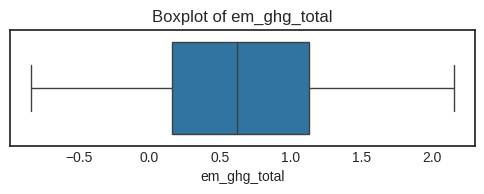

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 1.5))
sns.boxplot(x=df['em_ghg_total'])
plt.title(f"Boxplot of em_ghg_total")
plt.show()


## Plot

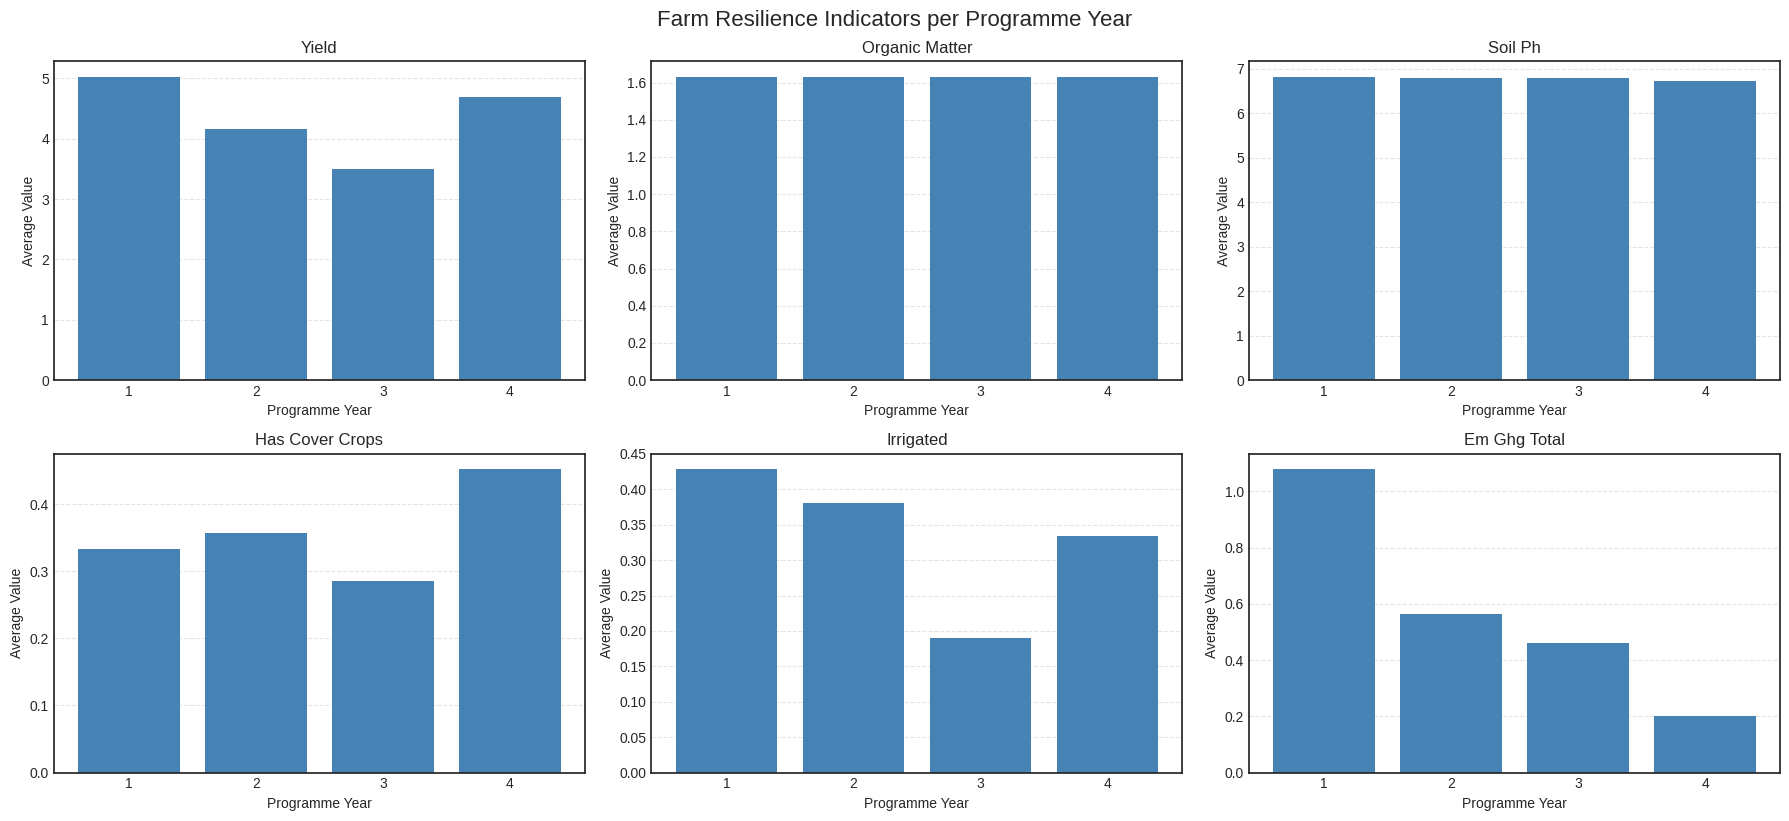

In [ ]:
# Compute averages per programme year
yearly_summary = df.groupby('programme_year')[
    ['yield', 'organic_matter', 'soil_ph', 'has_cover_crops',
     'irrigated', 'em_ghg_total']
].mean().reset_index()

# Merge it into the main summary
#yearly_summary = pd.merge(yearly_summary, rotation_diversity_years, on='farm_season_field_name')

# Columns to plot (excluding programme_year)
columns_to_plot = yearly_summary.columns[1:]

# Create grid of bar charts
n_cols = 3
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    axes[i].bar(yearly_summary['programme_year'], yearly_summary[col], color='steelblue')
    axes[i].set_title(col.replace('_', ' ').title())
    axes[i].set_xlabel("Programme Year")
    axes[i].set_xticks(yearly_summary['programme_year'].astype(int))
    axes[i].set_ylabel("Average Value")
    axes[i].grid(axis='y', linestyle='--', alpha=0.5)

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Farm Resilience Indicators per Programme Year", fontsize=16, y=1.02)
plt.show()


## Save Cleaned Output

In [ ]:
df.to_csv('cleaned_data_field.csv')